In [13]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"neharamesh123","key":"e431bed41e633b128ec3cc936edad88e"}'}

In [15]:
!pip install kaggle -q      # At first, I suspect the kaggle API lose effect so it doesn't have .kaggle folder. (not working)
!rm -rf /root/.kaggle.      # when I created the folder, it says the file or dir already exits
!mkdir /root/.kaggle        # successful
!mv kaggle.json /root/.kaggle/kaggle.json    # not sure if I have to use full destination path, I previously only used /root/.kaggle and it failed. Don't have time to validate this thought.
!ls /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
/root/.kaggle/kaggle.json


In [16]:
ls -la ~/.kaggle

total 16
drwxr-xr-x 2 root root 4096 Apr  1 15:27 ./
drwx------ 1 root root 4096 Apr  1 15:26 ../
-rw-r--r-- 1 root root   69 Apr  1 15:27 kaggle.json


In [17]:
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [18]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio


Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
License(s): CC-BY-NC-SA-4.0


In [19]:
import os
print(os.listdir("/content"))  # Check if the ZIP file is there


['.config', 'ravdess-emotional-speech-audio.zip', 'sample_data']


In [20]:
!unzip /content/ravdess-emotional-speech-audio.zip -d /content/ravdess_data


Archive:  /content/ravdess-emotional-speech-audio.zip
  inflating: /content/ravdess_data/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: /content/ravdess_data/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: /content/r

In [21]:
print(os.listdir("/content/ravdess_data"))


['Actor_08', 'Actor_06', 'Actor_09', 'Actor_22', 'Actor_16', 'Actor_14', 'Actor_20', 'Actor_17', 'Actor_21', 'Actor_19', 'Actor_01', 'Actor_23', 'audio_speech_actors_01-24', 'Actor_13', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_24', 'Actor_15', 'Actor_05', 'Actor_02', 'Actor_18', 'Actor_07', 'Actor_04', 'Actor_03']


In [22]:
RAVDESS = "/content/ravdess_data/audio_speech_actors_01-24/"
ravdess_dir_lis = os.listdir(RAVDESS)
print(ravdess_dir_lis)


['Actor_08', 'Actor_06', 'Actor_09', 'Actor_22', 'Actor_16', 'Actor_14', 'Actor_20', 'Actor_17', 'Actor_21', 'Actor_19', 'Actor_01', 'Actor_23', 'Actor_13', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_24', 'Actor_15', 'Actor_05', 'Actor_02', 'Actor_18', 'Actor_07', 'Actor_04', 'Actor_03']


In [23]:
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '03' : 'happy',
    '01' : 'neutral',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files:
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])

ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.tail()

,path,sex,emotion
1051,/content/ravdess_data/audio_speech_actors_01-2...,male,angry
1052,/content/ravdess_data/audio_speech_actors_01-2...,male,sad
1053,/content/ravdess_data/audio_speech_actors_01-2...,male,neutral
1054,/content/ravdess_data/audio_speech_actors_01-2...,male,fear
1055,/content/ravdess_data/audio_speech_actors_01-2...,male,sad


In [24]:
!kaggle datasets download -d ejlok1/cremad


Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad
License(s): ODC Attribution License (ODC-By)


In [25]:
print(os.listdir("/content"))  # Check if the ZIP file is there


['.config', 'ravdess_data', 'cremad.zip', 'ravdess-emotional-speech-audio.zip', 'sample_data']


In [26]:
!unzip /content/cremad.zip -d /content/cremad_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/cremad_data/AudioWAV/1031_DFA_DIS_XX.wav  
  inflating: /content/cremad_data/AudioWAV/1031_DFA_FEA_XX.wav  
  inflating: /content/cremad_data/AudioWAV/1031_DFA_HAP_XX.wav  
  inflating: /content/cremad_data/AudioWAV/1031_DFA_NEU_XX.wav  
  inflating: /content/cremad_data/AudioWAV/1031_DFA_SAD_XX.wav  
  inflating: /content/cremad_data/AudioWAV/1031_IEO_ANG_HI.wav  
  inflating: /content/cremad_data/AudioWAV/1031_IEO_ANG_LO.wav  
  inflating: /content/cremad_data/AudioWAV/1031_IEO_ANG_MD.wav  
  inflating: /content/cremad_data/AudioWAV/1031_IEO_DIS_HI.wav  
  inflating: /content/cremad_data/AudioWAV/1031_IEO_DIS_LO.wav  
  inflating: /content/cremad_data/AudioWAV/1031_IEO_DIS_MD.wav  
  inflating: /content/cremad_data/AudioWAV/1031_IEO_FEA_HI.wav  
  inflating: /content/cremad_data/AudioWAV/1031_IEO_FEA_LO.wav  
  inflating: /content/cremad_data/AudioWAV/1031_IEO_FEA_MD.wav  
  inflating: /content/cremad_data/Audio

In [27]:
print(os.listdir("/content/cremad_data"))


['AudioWAV']


In [30]:
CREMA = "/content/cremad_data/AudioWAV/"
cremad_dir_lis = os.listdir(CREMAD)
print(cremad_dir_lis)

['1021_DFA_FEA_XX.wav', '1085_MTI_HAP_XX.wav', '1030_IEO_FEA_LO.wav', '1023_ITS_FEA_XX.wav', '1026_TSI_ANG_XX.wav', '1002_ITS_FEA_XX.wav', '1026_IEO_FEA_MD.wav', '1049_IWW_HAP_XX.wav', '1031_ITH_DIS_XX.wav', '1084_MTI_NEU_XX.wav', '1020_IEO_NEU_XX.wav', '1047_TAI_HAP_XX.wav', '1058_ITS_HAP_XX.wav', '1001_ITH_DIS_XX.wav', '1081_TIE_SAD_XX.wav', '1005_TAI_ANG_XX.wav', '1061_IEO_DIS_HI.wav', '1024_IOM_ANG_XX.wav', '1003_TIE_FEA_XX.wav', '1087_TIE_HAP_XX.wav', '1039_ITS_HAP_XX.wav', '1076_TSI_SAD_XX.wav', '1014_ITS_DIS_XX.wav', '1085_IWL_ANG_XX.wav', '1074_IEO_HAP_MD.wav', '1005_ITH_ANG_XX.wav', '1082_TSI_NEU_XX.wav', '1088_IEO_FEA_HI.wav', '1020_ITS_FEA_XX.wav', '1003_DFA_ANG_XX.wav', '1037_MTI_FEA_XX.wav', '1033_IEO_NEU_XX.wav', '1009_TSI_NEU_XX.wav', '1063_IOM_DIS_XX.wav', '1060_ITH_FEA_XX.wav', '1028_MTI_DIS_XX.wav', '1023_TIE_ANG_XX.wav', '1021_DFA_NEU_XX.wav', '1082_WSI_FEA_XX.wav', '1090_IEO_FEA_HI.wav', '1047_IWW_ANG_XX.wav', '1034_ITH_ANG_XX.wav', '1034_ITS_ANG_XX.wav', '1016_IOM_

In [31]:
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018',
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047',
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072',
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in cremad_dir_lis:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,/content/cremad_data/AudioWAV/1061_IEO_DIS_HI.wav,female,disgust
1,/content/cremad_data/AudioWAV/1088_IEO_FEA_HI.wav,male,fear
2,/content/cremad_data/AudioWAV/1090_IEO_FEA_HI.wav,male,fear
3,/content/cremad_data/AudioWAV/1025_IEO_DIS_HI.wav,female,disgust
4,/content/cremad_data/AudioWAV/1067_IEO_SAD_HI.wav,male,sad


In [32]:
!kaggle datasets download -d ejlok1/surrey-audiovisual-expressed-emotion-savee

Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee
License(s): copyright-authors


In [33]:
import os
print(os.listdir("/content"))  # Check if the ZIP file is there


['.config', 'ravdess_data', 'surrey-audiovisual-expressed-emotion-savee.zip', 'cremad.zip', 'cremad_data', 'ravdess-emotional-speech-audio.zip', 'sample_data']


In [34]:
!unzip /content/surrey-audiovisual-expressed-emotion-savee.zip -d /content/savee_data


Archive:  /content/surrey-audiovisual-expressed-emotion-savee.zip
  inflating: /content/savee_data/ALL/DC_a01.wav  
  inflating: /content/savee_data/ALL/DC_a02.wav  
  inflating: /content/savee_data/ALL/DC_a03.wav  
  inflating: /content/savee_data/ALL/DC_a04.wav  
  inflating: /content/savee_data/ALL/DC_a05.wav  
  inflating: /content/savee_data/ALL/DC_a06.wav  
  inflating: /content/savee_data/ALL/DC_a07.wav  
  inflating: /content/savee_data/ALL/DC_a08.wav  
  inflating: /content/savee_data/ALL/DC_a09.wav  
  inflating: /content/savee_data/ALL/DC_a10.wav  
  inflating: /content/savee_data/ALL/DC_a11.wav  
  inflating: /content/savee_data/ALL/DC_a12.wav  
  inflating: /content/savee_data/ALL/DC_a13.wav  
  inflating: /content/savee_data/ALL/DC_a14.wav  
  inflating: /content/savee_data/ALL/DC_a15.wav  
  inflating: /content/savee_data/ALL/DC_d01.wav  
  inflating: /content/savee_data/ALL/DC_d02.wav  
  inflating: /content/savee_data/ALL/DC_d03.wav  
  inflating: /content/savee_data/A

In [35]:
print(os.listdir("/content/savee_data"))


['ALL']


In [36]:
SAVEE = "/content/savee_data/ALL"
savee_dir_lis = os.listdir(SAVEE)
print(savee_dir_lis)


['KL_d02.wav', 'JE_sa13.wav', 'JK_n07.wav', 'JE_h06.wav', 'JK_su01.wav', 'KL_su01.wav', 'DC_h10.wav', 'JK_h10.wav', 'JE_f11.wav', 'DC_su09.wav', 'DC_h11.wav', 'DC_a15.wav', 'JK_a05.wav', 'JK_su02.wav', 'JK_n12.wav', 'JK_n19.wav', 'JE_h10.wav', 'JE_sa14.wav', 'JK_d15.wav', 'JK_n01.wav', 'KL_su04.wav', 'KL_su05.wav', 'JK_su14.wav', 'JK_n08.wav', 'JE_sa07.wav', 'KL_n12.wav', 'JK_h04.wav', 'JE_n10.wav', 'JE_d11.wav', 'JE_n29.wav', 'KL_sa12.wav', 'DC_f03.wav', 'KL_d12.wav', 'KL_sa05.wav', 'JE_f10.wav', 'KL_d13.wav', 'KL_n05.wav', 'JE_d08.wav', 'JE_n15.wav', 'KL_n07.wav', 'KL_a04.wav', 'JK_n02.wav', 'JK_sa10.wav', 'KL_a09.wav', 'DC_d01.wav', 'KL_n24.wav', 'JK_su04.wav', 'JE_h14.wav', 'DC_n06.wav', 'JE_d14.wav', 'DC_n04.wav', 'JE_f05.wav', 'JE_h01.wav', 'JE_f06.wav', 'DC_h02.wav', 'DC_f15.wav', 'JK_n16.wav', 'DC_f05.wav', 'KL_a11.wav', 'JK_a01.wav', 'JK_n22.wav', 'KL_su14.wav', 'DC_h15.wav', 'JK_d03.wav', 'KL_n16.wav', 'JE_sa10.wav', 'JK_d04.wav', 'DC_d07.wav', 'JK_n26.wav', 'JK_a14.wav', 'JE

In [37]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)


In [38]:
import os
print(os.listdir("/content"))  # Check if the ZIP file is there


['.config', 'ravdess_data', 'surrey-audiovisual-expressed-emotion-savee.zip', 'cremad.zip', 'cremad_data', 'savee_data', 'ravdess-emotional-speech-audio.zip', 'toronto-emotional-speech-set-tess.zip', 'sample_data']


In [39]:
!unzip /content/toronto-emotional-speech-set-tess.zip -d /content/tess_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: /content/tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: /content/tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: /content/tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: /content/tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: /content/tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: /content/tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: /content/tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: /content/tess_data/TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: /content/tess_data/T

In [40]:
print(os.listdir("/content/tess_data"))


['tess toronto emotional speech set data', 'TESS Toronto emotional speech set data']


In [41]:
TESS = "/content/tess_data/TESS Toronto emotional speech set data/"
tess_dir_lis = os.listdir(TESS)
print(tess_dir_lis)


['YAF_disgust', 'OAF_angry', 'YAF_happy', 'OAF_happy', 'OAF_Fear', 'YAF_sad', 'YAF_angry', 'YAF_fear', 'YAF_neutral', 'OAF_disgust', 'OAF_Sad', 'OAF_neutral', 'YAF_pleasant_surprised', 'OAF_Pleasant_surprise']


In [42]:
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_lis:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}{directory}/{audio_file}")
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])

tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,/content/tess_data/TESS Toronto emotional spee...,female,disgust
1,/content/tess_data/TESS Toronto emotional spee...,female,disgust
2,/content/tess_data/TESS Toronto emotional spee...,female,disgust
3,/content/tess_data/TESS Toronto emotional spee...,female,disgust
4,/content/tess_data/TESS Toronto emotional spee...,female,disgust


In [43]:
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_lis:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])

savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.tail()

,path,sex,emotion
415,/content/savee_data/ALLDC_sa08.wav,male,sad
416,/content/savee_data/ALLDC_sa01.wav,male,sad
417,/content/savee_data/ALLKL_h04.wav,male,happy
418,/content/savee_data/ALLDC_n27.wav,male,neutral
419,/content/savee_data/ALLJK_d01.wav,male,disgust


In [44]:
# Assuming all datasets are stored in separate DataFrames: ravdess_df, crema_df, tess_df, savee_df
dataset_df = pd.concat([ravdess_df, crema_df, tess_df, savee_df], ignore_index=True)

# Show the combined dataset
print(dataset_df.tail())


                                    path   sex  emotion
4326  /content/savee_data/ALLDC_sa08.wav  male      sad
4327  /content/savee_data/ALLDC_sa01.wav  male      sad
4328   /content/savee_data/ALLKL_h04.wav  male    happy
4329   /content/savee_data/ALLDC_n27.wav  male  neutral
4330   /content/savee_data/ALLJK_d01.wav  male  disgust


In [45]:
import os

# Function to check if file exists
def file_exists(file_path):
    return os.path.exists(file_path)

# Keep only rows where the file exists
dataset_df = dataset_df[dataset_df["path"].apply(file_exists)].reset_index(drop=True)

# Print final dataset size after removing missing files
print("Dataset size after dropping missing files:", dataset_df.shape)


Dataset size after dropping missing files: (3911, 3)


In [47]:
gender_counts = dataset_df["sex"].value_counts()

# Print the count of each emotion
print("Gender Distribution:\n", gender_counts)

Gender Distribution:
 sex
female    3143
male       768
Name: count, dtype: int64


In [48]:
emotion_counts = dataset_df["emotion"].value_counts()

# Print the count of each emotion
print("Emotion Distribution:\n", emotion_counts)

Emotion Distribution:
 emotion
angry      683
sad        683
fear       683
happy      683
disgust    683
neutral    496
Name: count, dtype: int64


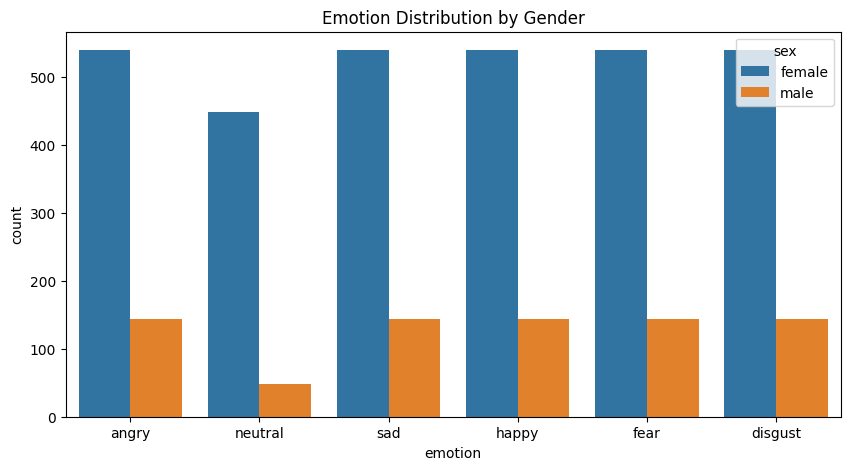

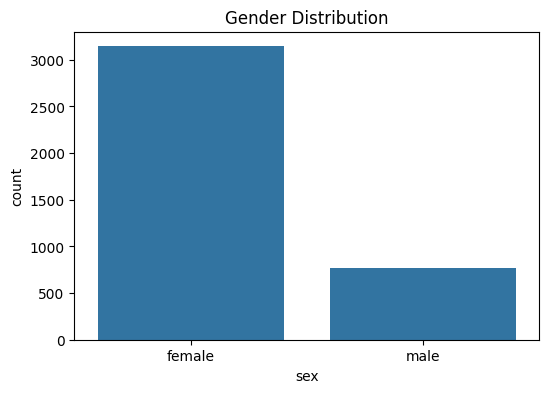

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot emotion distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset_df, x='emotion', hue='sex')
plt.title("Emotion Distribution by Gender")
plt.show()

# Plot gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset_df, x='sex')
plt.title("Gender Distribution")
plt.show()

Feature Extraction

In [50]:
import librosa
import numpy as np

def extract_features(audio_path, sr=22050, n_mfcc=40, frame_length=2048, hop_length=512, max_pad_len=400):
    """
    Extract audio features including MFCC, ZCR, TEO, pitch, and energy.
    Returns a dictionary of features.
    """
    try:
        # Load audio
        y, sr = librosa.load(audio_path, sr=sr)

        # --- MFCC ---
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc,
                                   n_fft=frame_length, hop_length=hop_length)
        mfcc_mean = np.mean(mfcc, axis=1)  # Mean across frames

        # --- Pitch and Energy ---
        pitches, _ = librosa.piptrack(y=y, sr=sr)
        mean_pitch = np.mean(pitches[pitches > 0]) if np.any(pitches > 0) else 0
        energy = np.sum(librosa.feature.rms(y=y))

        # --- Chroma ---
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)

        # --- Zero Crossing Rate (ZCR) ---
        zcr = librosa.feature.zero_crossing_rate(y, frame_length=frame_length, hop_length=hop_length)
        zcr_mean = np.mean(zcr)

        # --- Teager Energy Operator (TEO) ---
        teo = np.array([y[i]**2 - y[i-1]*y[i+1] for i in range(1, len(y)-1)])
        teo_frames = librosa.util.frame(teo, frame_length=frame_length, hop_length=hop_length)
        teo_mean = np.mean(teo_frames)

        return {
            'mfcc': mfcc_mean.tolist(),  # Convert to list for DataFrame storage
            'chroma': chroma_mean.tolist(),
            'zcr': float(zcr_mean),
            'teo': float(teo_mean),
            'pitch': float(mean_pitch),
            'energy': float(energy),
            'path': audio_path
        }

    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

In [51]:
import pandas as pd

# Assuming you have a DataFrame `ravdess_df` with a 'path' column
features_list = []
for path in dataset_df['path']:
    features = extract_features(path)
    if features is not None:  # Only append if extraction succeeded
        features_list.append(features)

# Convert to DataFrame
features_df = pd.DataFrame(features_list)

# Merge with original DataFrame
final_df = pd.concat([dataset_df, features_df.drop(columns=['path'])], axis=1)
final_df.head()

,path,sex,emotion,mfcc,chroma,zcr,teo,pitch,energy
0,/content/ravdess_data/audio_speech_actors_01-2...,female,angry,"[-491.6878356933594, 30.02005958557129, -4.591...","[0.497964084148407, 0.4794604480266571, 0.5267...",0.172432,0.000230,1218.921021,3.397115
1,/content/ravdess_data/audio_speech_actors_01-2...,female,neutral,"[-688.74755859375, 63.24864959716797, 8.932160...","[0.5307890772819519, 0.5035210251808167, 0.455...",0.173139,0.000002,1231.799316,0.380112
2,/content/ravdess_data/audio_speech_actors_01-2...,female,neutral,"[-683.5370483398438, 63.51032638549805, 11.813...","[0.3500780463218689, 0.3693939447402954, 0.368...",0.181733,0.000002,914.727966,0.451137
3,/content/ravdess_data/audio_speech_actors_01-2...,female,sad,"[-664.9930419921875, 59.323875427246094, -1.17...","[0.4808400571346283, 0.47842928767204285, 0.44...",0.162017,0.000002,1594.608887,0.510195
4,/content/ravdess_data/audio_speech_actors_01-2...,female,happy,"[-538.96240234375, 49.61705780029297, -21.3867...","[0.3419684171676636, 0.34288489818573, 0.39785...",0.141230,0.000054,1607.974487,1.786722


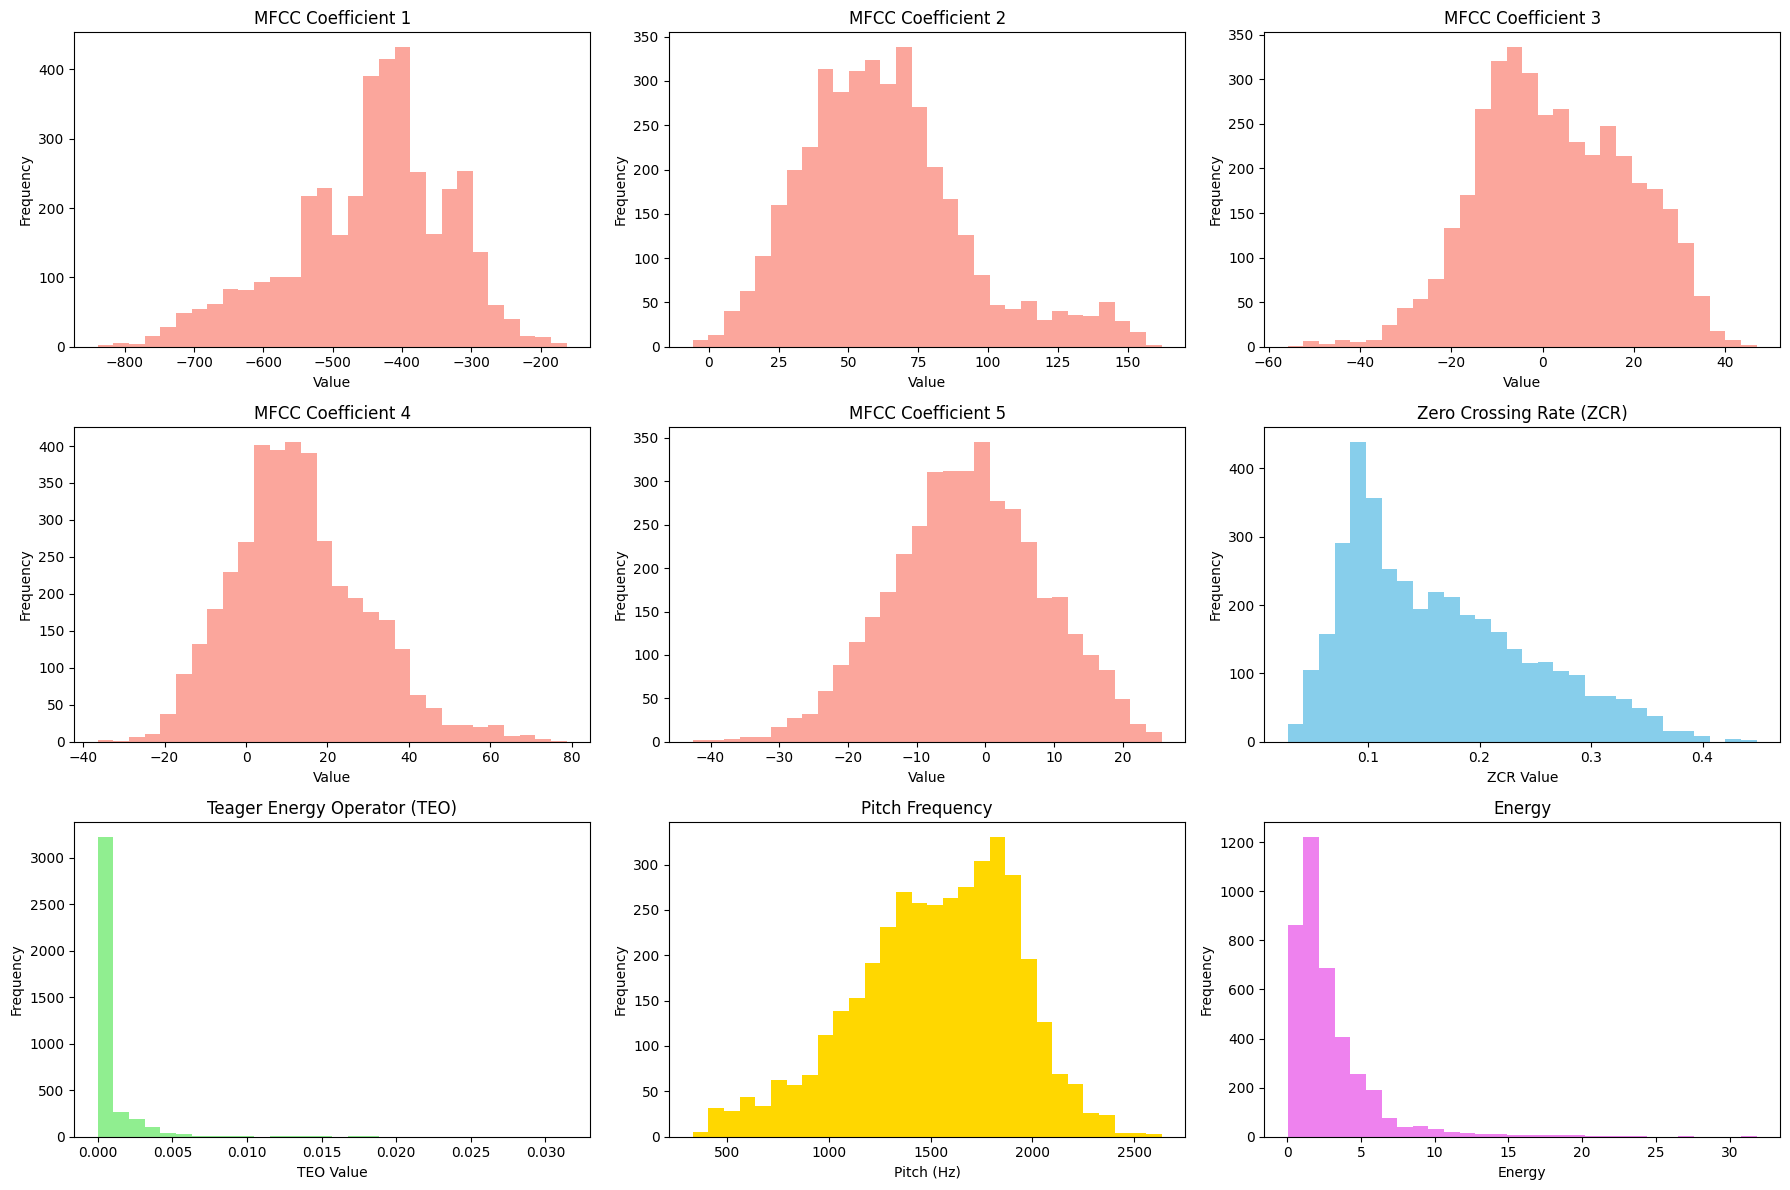

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure
plt.figure(figsize=(18, 12))

# --- MFCC Features (First 5 coefficients) ---
for i in range(5):
    plt.subplot(3, 3, i+1)
    plt.hist([x[i] for x in final_df['mfcc']], bins=30, color='salmon', alpha=0.7)
    plt.title(f'MFCC Coefficient {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# --- Zero Crossing Rate (ZCR) ---
plt.subplot(3, 3, 6)
plt.hist(final_df['zcr'], bins=30, color='skyblue')
plt.title('Zero Crossing Rate (ZCR)')
plt.xlabel('ZCR Value')
plt.ylabel('Frequency')

# --- Teager Energy Operator (TEO) ---
plt.subplot(3, 3, 7)
plt.hist(final_df['teo'], bins=30, color='lightgreen')
plt.title('Teager Energy Operator (TEO)')
plt.xlabel('TEO Value')
plt.ylabel('Frequency')

# --- Pitch ---
plt.subplot(3, 3, 8)
plt.hist(final_df['pitch'], bins=30, color='gold')
plt.title('Pitch Frequency')
plt.xlabel('Pitch (Hz)')
plt.ylabel('Frequency')

# --- Energy ---
plt.subplot(3, 3, 9)
plt.hist(final_df['energy'], bins=30, color='violet')
plt.title('Energy')
plt.xlabel('Energy')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

LSTM

In [89]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Convert features to numpy arrays
X = np.array(final_df['mfcc'].tolist())  # MFCC features (n_samples, n_mfcc)

# Add other features as additional dimensions
other_features = final_df[['zcr', 'teo', 'pitch', 'energy']].values
X = np.hstack([X, other_features])  # Combined features (n_samples, n_mfcc + 4)

# Reshape for LSTM (samples, timesteps, features)
# We'll treat each feature as a timestep (reshape to n_samples, 1, n_features)
X = X.reshape(X.shape[0], 1, X.shape[1])

# Encode labels
encoder = LabelEncoder()
y = encoder.fit_transform(final_df['emotion'])
y = to_categorical(y)  # One-hot encoding

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

print(f"Training shape: {X_train.shape}, Test shape: {X_test.shape}")

Training shape: (3128, 1, 44), Test shape: (783, 1, 44)


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),  # Added closing parenthesis here
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')  # Output layer
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          88,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97,222 (379.77 KB)

 Trainable params: 97,222 (379.77 KB)

 Non-trainable params: 0 (0.00 B)

In [55]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4450 - loss: 1.4880 - val_accuracy: 0.6935 - val_loss: 0.8442
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7273 - loss: 0.7688 - val_accuracy: 0.7471 - val_loss: 0.6515
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7862 - loss: 0.5890 - val_accuracy: 0.7739 - val_loss: 0.5902
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7869 - loss: 0.5650 - val_accuracy: 0.7803 - val_loss: 0.5620
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8067 - loss: 0.5097 - val_accuracy: 0.7842 - val_loss: 0.5258
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8032 - loss: 0.4882 - val_accuracy: 0.7982 - val_loss: 0.5070
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8252 - loss: 0.4417 - val_accuracy: 0.7957 - val_loss: 0.4959
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8268 - loss: 0.4523 - val_accuracy: 0.8008 - val_lo

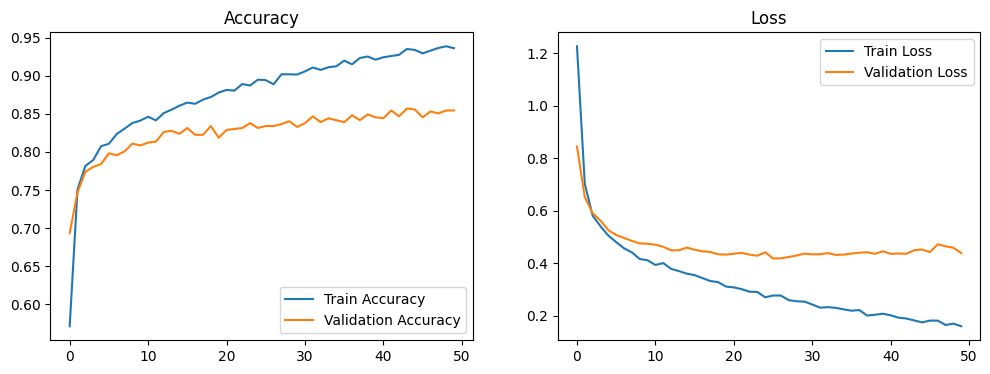

Test Accuracy: 0.8544


In [56]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.8544
Precision: 0.8571
Recall: 0.8544
F1 Score: 0.8544
Classification Report:
              precision    recall  f1-score   support

       angry     0.8750    0.9065    0.8905       139
     disgust     0.9000    0.8417    0.8699       139
        fear     0.7415    0.8583    0.7956       127
       happy     0.8258    0.7415    0.7814       147
     neutral     0.9588    0.9588    0.9588        97
         sad     0.8647    0.8582    0.8614       134

    accuracy                         0.8544       783
   macro avg     0.8609    0.8608    0.8596       783
weighted avg     0.8571    0.8544    0.8544       783



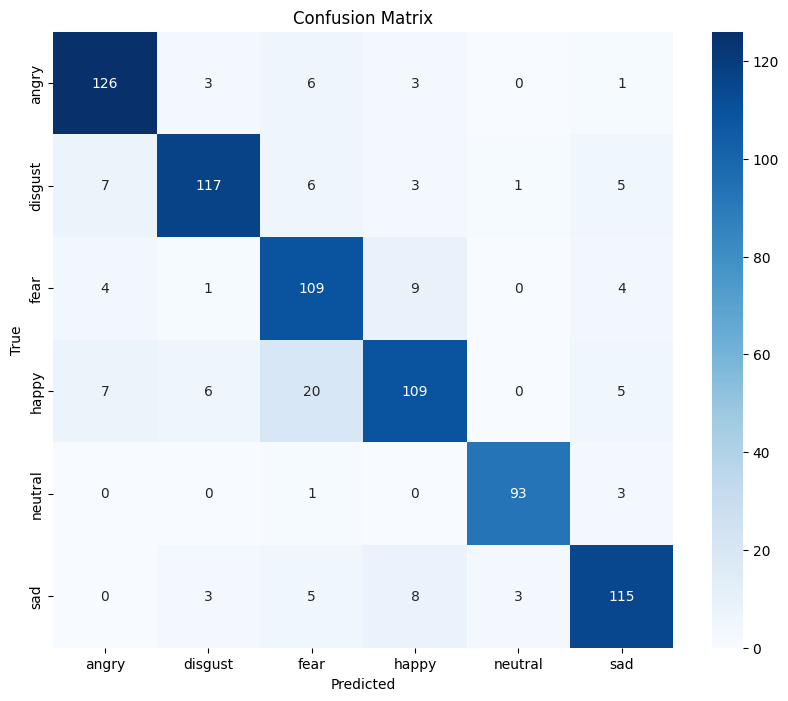

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Get class names
class_names = encoder.classes_

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names, digits=4))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

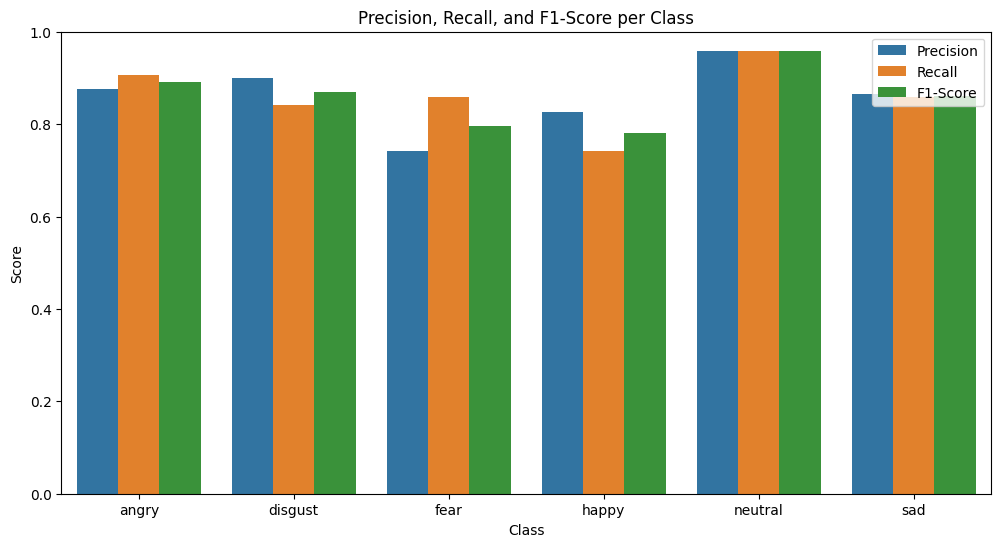

In [58]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate metrics per class
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred_classes, average=None)
metrics_df = pd.DataFrame({
    'Class': class_names,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
})

# Melt for better plotting
melted_df = metrics_df.melt(id_vars='Class', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Class', y='Score', hue='Metric')
plt.title('Precision, Recall, and F1-Score per Class')
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.show()

VAE

In [ ]:
from tensorflow.keras.layers import Conv1D, BatchNormalization, LeakyReLU, Dropout, Conv1DTranspose, Model, Input, Flatten, Reshape
from tensorflow.keras import backend as K

# VAE-specific parameters (rename all with vae_ prefix)
vae_original_dim = X_train.shape[1]
vae_intermediate_dim = 256
vae_latent_dim = 64
vae_batch_size = 64
vae_epochs = 200

# Custom sampling layer for VAE
class VAESampling(Layer):
    def call(self, inputs):
        vae_z_mean, vae_z_log_var = inputs
        batch = tf.shape(vae_z_mean)[0]
        dim = tf.shape(vae_z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return vae_z_mean + K.exp(0.5 * vae_z_log_var) * epsilon

# VAE Encoder
vae_inputs = Input(shape=(vae_original_dim, 1), name='vae_encoder_input')

vae_x = Conv1D(64, 3, activation='relu', padding='same')(vae_inputs)
vae_x = BatchNormalization()(vae_x)
vae_x = LeakyReLU()(vae_x)
vae_x = Dropout(0.2)(vae_x)

vae_x = Conv1D(128, 3, activation='relu', padding='same')(vae_x)
vae_x = BatchNormalization()(vae_x)
vae_x = LeakyReLU()(vae_x)
vae_x = Dropout(0.2)(vae_x)

vae_x = Flatten()(vae_x)
vae_x = Dense(vae_intermediate_dim, activation='relu')(vae_x)
vae_x = BatchNormalization()(vae_x)
vae_x = Dropout(0.3)(vae_x)

vae_z_mean = Dense(vae_latent_dim, name='vae_z_mean')(vae_x)
vae_z_log_var = Dense(vae_latent_dim, name='vae_z_log_var')(vae_x)
vae_z = VAESampling()([vae_z_mean, vae_z_log_var])

vae_encoder = Model(vae_inputs, [vae_z_mean, vae_z_log_var, vae_z], name='vae_encoder')

# VAE Decoder
vae_latent_inputs = Input(shape=(vae_latent_dim,), name='vae_z_sampling')
vae_x = Dense(vae_intermediate_dim, activation='relu')(vae_latent_inputs)
vae_x = BatchNormalization()(vae_x)
vae_x = Dropout(0.3)(vae_x)

vae_x = Dense(64 * vae_original_dim, activation='relu')(vae_x)
vae_x = Reshape((vae_original_dim, 64))(vae_x)

vae_x = Conv1DTranspose(128, 3, activation='relu', padding='same')(vae_x)
vae_x = BatchNormalization()(vae_x)
vae_x = LeakyReLU()(vae_x)
vae_x = Dropout(0.2)(vae_x)

vae_x = Conv1DTranspose(64, 3, activation='relu', padding='same')(vae_x)
vae_x = BatchNormalization()(vae_x)
vae_x = LeakyReLU()(vae_x)
vae_x = Dropout(0.2)(vae_x)

vae_outputs = Conv1D(1, 3, activation='sigmoid', padding='same')(vae_x)
vae_decoder = Model(vae_latent_inputs, vae_outputs, name='vae_decoder')

In [125]:
vae_classifier_inputs = Input(shape=(vae_latent_dim,))
vae_x = Dense(256, activation='relu')(vae_classifier_inputs)
vae_x = Dropout(0.4)(vae_x)
vae_x = Dense(128, activation='relu')(vae_x)
vae_x = Dropout(0.3)(vae_x)
vae_class_outputs = Dense(len(label_encoder.classes_), activation='softmax')(vae_x)

vae_classifier = Model(vae_classifier_inputs, vae_class_outputs, name='vae_classifier')

# Combined VAE Model
vae_combined_outputs = vae_decoder(vae_encoder(vae_inputs)[2])
vae_class_outputs = vae_classifier(vae_encoder(vae_inputs)[2])
vae_combined_model = Model(vae_inputs, [vae_combined_outputs, vae_class_outputs], name='vae_combined_model')

In [126]:
def vae_custom_loss(vae_inputs, vae_outputs):
    reconstructed, classified = vae_outputs

    # Reconstruction loss
    reconstruction_loss = mse(K.flatten(vae_inputs), K.flatten(reconstructed))
    reconstruction_loss *= vae_original_dim

    # KL divergence
    vae_z_mean, vae_z_log_var, _ = vae_encoder(vae_inputs)
    kl_loss = 1 + vae_z_log_var - K.square(vae_z_mean) - K.exp(vae_z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5

    # Classification loss
    class_loss = tf.keras.losses.categorical_crossentropy(vae_inputs[1], classified)

    total_loss = K.mean(reconstruction_loss + kl_loss + 0.5 * class_loss)
    return total_loss

vae_combined_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss={
        'vae_decoder': 'mse',
        'vae_classifier': 'categorical_crossentropy'
    },
    loss_weights=[0.5, 0.5],
    metrics={'vae_classifier': 'accuracy'}
)

# VAE Training
vae_history = vae_combined_model.fit(
    X_train,
    {'vae_decoder': X_train, 'vae_classifier': y_train},
    validation_data=(X_test, {'vae_decoder': X_test, 'vae_classifier': y_test}),
    epochs=50,
    batch_size=vae_batch_size,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 74s 188ms/step - loss: 1.9075 - vae_classifier_accuracy: 0.2060 - vae_classifier_loss: 2.5385 - vae_decoder_loss: 1.2765 - val_loss: 1.5217 - val_vae_classifier_accuracy: 0.2427 - val_vae_classifier_loss: 1.7881 - val_vae_decoder_loss: 1.2573 - learning_rate: 1.0000e-04
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 182ms/step - loss: 1.4518 - vae_classifier_accuracy: 0.3613 - vae_classifier_loss: 1.7533 - vae_decoder_loss: 1.1503 - val_loss: 1.4512 - val_vae_classifier_accuracy: 0.3295 - val_vae_classifier_loss: 1.6450 - val_vae_decoder_loss: 1.2538 - learning_rate: 1.0000e-04
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - loss: 1.2174 - vae_classifier_accuracy: 0.4866 - vae_classifier_loss: 1.4005 - vae_decoder_loss: 1.0344 - val_loss: 1.2785 - val_vae_classifier_accuracy: 0.5249 - val_vae_classifier_loss: 1.3132 - val_vae_decoder_loss: 1.2412 - learning_rate: 1.0000e-04
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 1.0457 - vae_c

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

# Extract latent features from VAE encoder
_, _, vae_z_train = vae_encoder.predict(X_train)
_, _, vae_z_test = vae_encoder.predict(X_test)

# Convert one-hot labels back to class indices
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Train Gradient Boosting classifier on VAE latent features
gb_classifier = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
gb_classifier.fit(vae_z_train, y_train_labels)

# Now get predictions
vae_y_pred = gb_classifier.predict(vae_z_test)
vae_y_true = y_test_labels

98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [129]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score, classification_report)


# Calculate metrics
vae_accuracy = accuracy_score(vae_y_true, vae_y_pred)
vae_precision = precision_score(vae_y_true, vae_y_pred, average='weighted')
vae_recall = recall_score(vae_y_true, vae_y_pred, average='weighted')
vae_f1 = f1_score(vae_y_true, vae_y_pred, average='weighted')


print(f"Accuracy:{vae_accuracy:.4f}")

print(f"Precision: {vae_precision:.4f}")
print(f"Recall: {vae_recall:.4f}")

print(f"F1 Score: {vae_f1:.4f}")


# Classification Report with enhanced formatting
print("Classification Report:")
clf_report = classification_report(vae_y_true, vae_y_pred, target_names=label_encoder.classes_)
print(clf_report)

Accuracy:0.8301
Precision: 0.8315
Recall: 0.8301
F1 Score: 0.8305
Classification Report:
              precision    recall  f1-score   support

       angry       0.92      0.87      0.90       139
     disgust       0.83      0.84      0.84       139
        fear       0.77      0.80      0.78       127
       happy       0.81      0.77      0.79       147
     neutral       0.89      0.91      0.90        97
         sad       0.79      0.82      0.80       134

    accuracy                           0.83       783
   macro avg       0.83      0.83      0.83       783
weighted avg       0.83      0.83      0.83       783



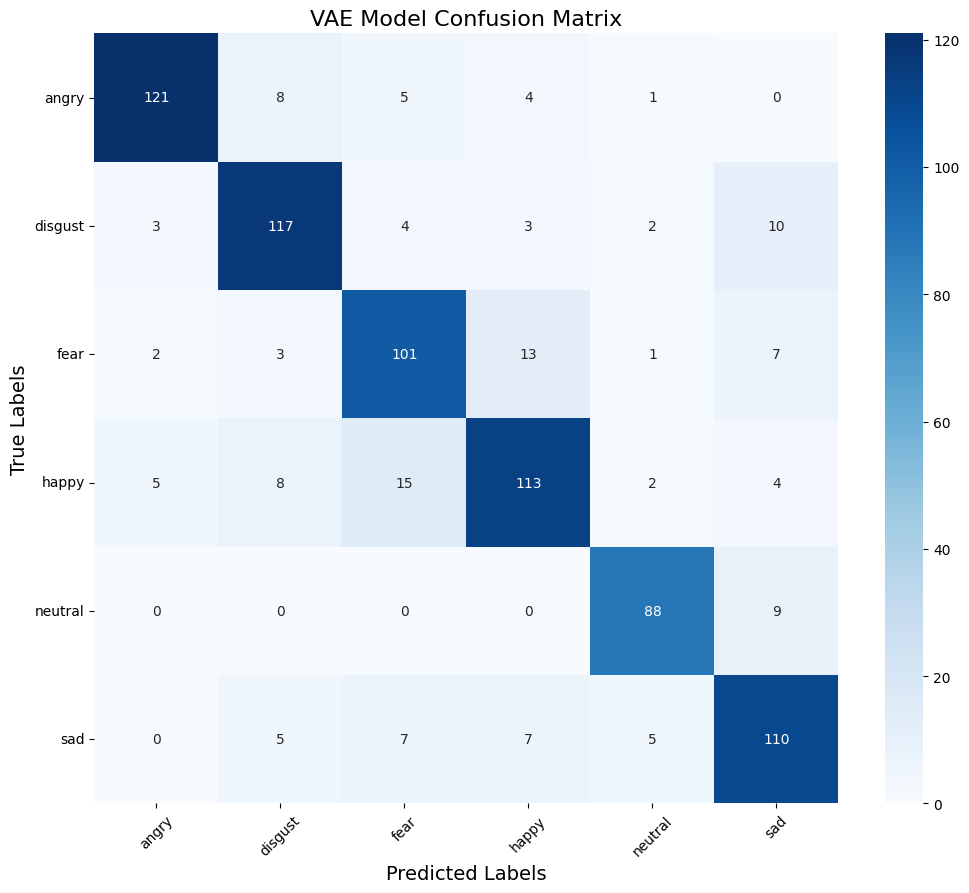

In [134]:
def plot_confusion_matrix(y_true, y_pred, classes, model_name):
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes,
                yticklabels=classes)
    plt.title(f'{model_name} Confusion Matrix', fontsize=16)
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

plot_confusion_matrix(vae_y_true, vae_y_pred, label_encoder.classes_, "VAE Model")

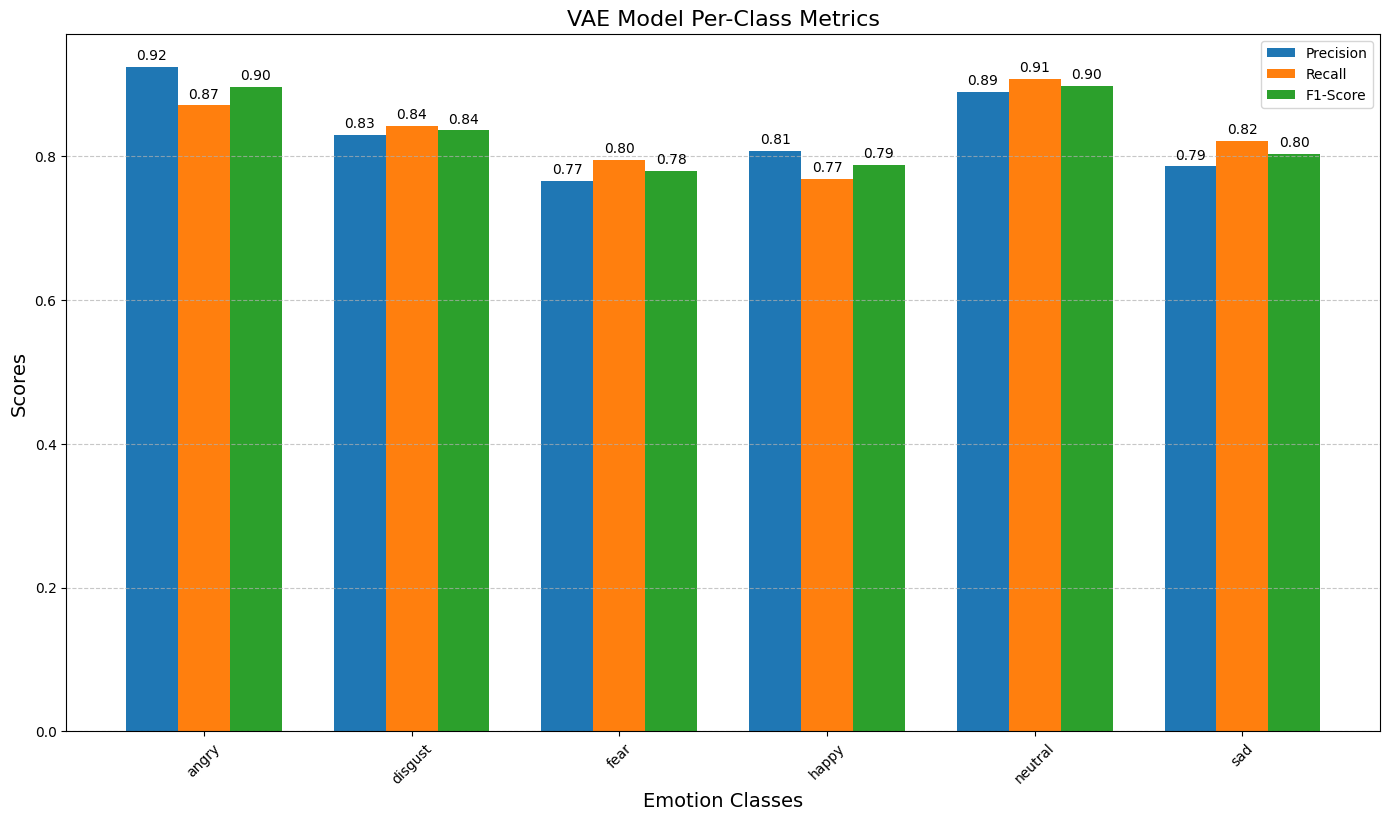

In [135]:
def plot_per_class_metrics(y_true, y_pred, classes, model_name):
    clf_report = classification_report(y_true, y_pred, output_dict=True)

    metrics = {
        'Precision': [clf_report[str(i)]['precision'] for i in range(len(classes))],
        'Recall': [clf_report[str(i)]['recall'] for i in range(len(classes))],
        'F1-Score': [clf_report[str(i)]['f1-score'] for i in range(len(classes))]
    }

    x = np.arange(len(classes))
    width = 0.25

    fig, ax = plt.subplots(figsize=(14, 8))
    rects1 = ax.bar(x - width, metrics['Precision'], width, label='Precision')
    rects2 = ax.bar(x, metrics['Recall'], width, label='Recall')
    rects3 = ax.bar(x + width, metrics['F1-Score'], width, label='F1-Score')

    ax.set_xlabel('Emotion Classes', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)
    ax.set_title(f'{model_name} Per-Class Metrics', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(classes)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

plot_per_class_metrics(vae_y_true, vae_y_pred, label_encoder.classes_, "VAE Model")


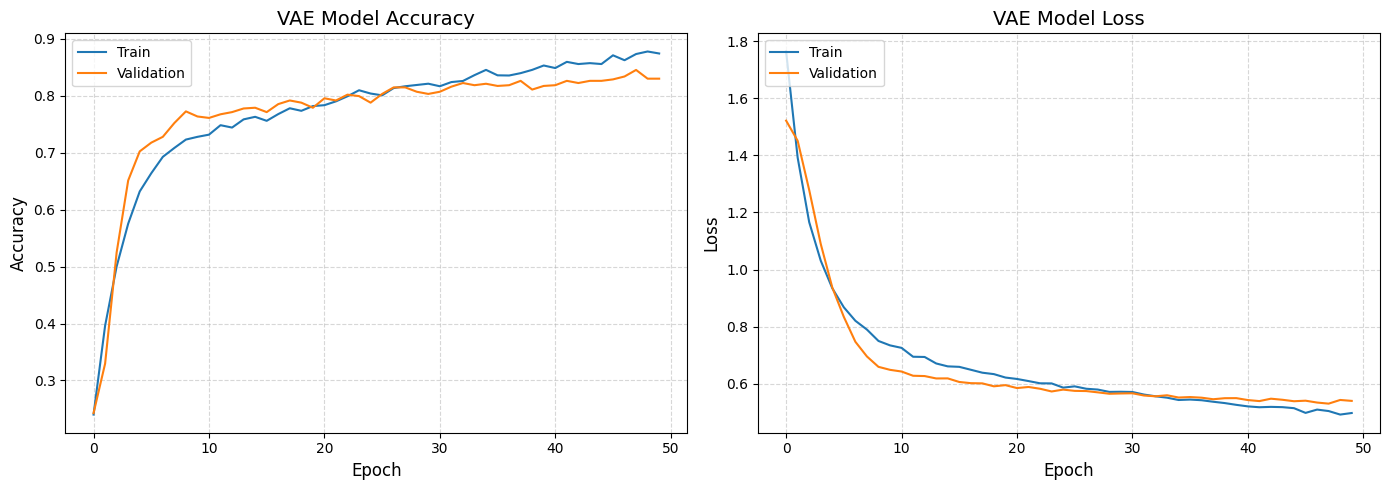

In [136]:
def plot_training_history(history, model_name):
    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['vae_classifier_accuracy'])
    plt.plot(history.history['val_vae_classifier_accuracy'])
    plt.title(f'{model_name} Accuracy', fontsize=14)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(linestyle='--', alpha=0.5)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss', fontsize=14)
    plt.ylabel('Loss', fontsize=12)
    plt.xlabel('Epoch', fontsize=12)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.grid(linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

plot_training_history(vae_history, "VAE Model")